# Brain Stroke Prediction 
### This machine learning project predicts the likelihood of stroke occurrence by analyzing various health and lifestyle factors that contribute to stroke risk.  

The features of the dataset are:  

1. **Gender:** Biological sex of the individual.  
2. **Age (years):** Age of the person.  
3. **Hypertension:** Presence (1) or absence (0) of high blood pressure.  
4. **Heart Disease:** Presence (1) or absence (0) of heart disease.  
5. **Ever Married:** Whether the individual has ever been married (Yes/No).  
6. **Work Type:** Employment category (e.g., Private, Self-employed).  
7. **Residence Type:** Living environment (Urban/Rural).  
8. **Average Glucose Level (mg/dL):** Blood glucose concentration.  
9. **BMI:** Body mass index, indicating weight status.  
10. **Smoking Status:** Smoking history (e.g., never smoked, formerly smoked, smokes).  

The target variable is **Stroke**, which indicates:  

- **0:** No stroke occurred.  
- **1:** Stroke occurred.  



# Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Reading and Understanding

In [6]:

df=pd.read_csv("brain_stroke (1).csv")

In [7]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


#  Checking Datatypes

In [9]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


#    Checking null values

In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.shape

(4981, 11)

In [13]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Checking each categorical data for distribution.

In [14]:
for col in ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for gender:
Female    2907
Male      2074
Name: gender, dtype: int64
------------------------------
Value counts for ever_married:
Yes    3280
No     1701
Name: ever_married, dtype: int64
------------------------------
Value counts for work_type:
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
------------------------------
Value counts for Residence_type:
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
------------------------------
Value counts for smoking_status:
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
------------------------------


# Dataset before dropping the outliers

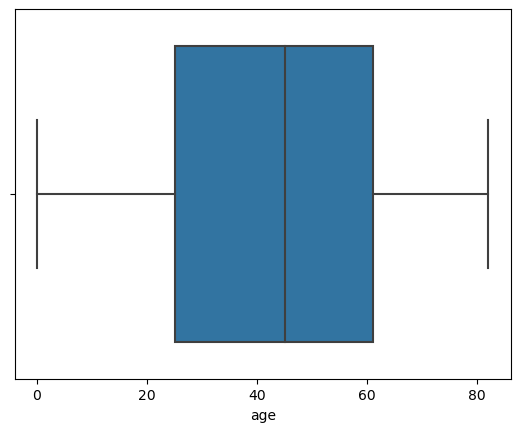

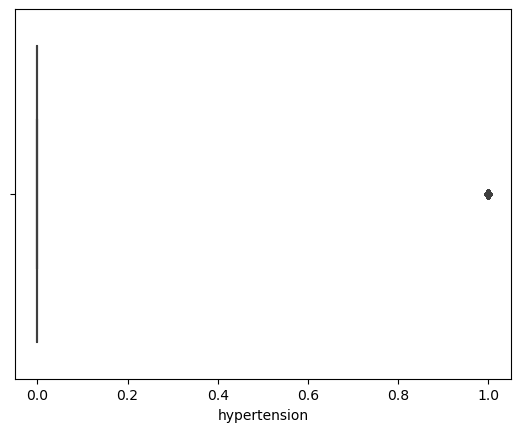

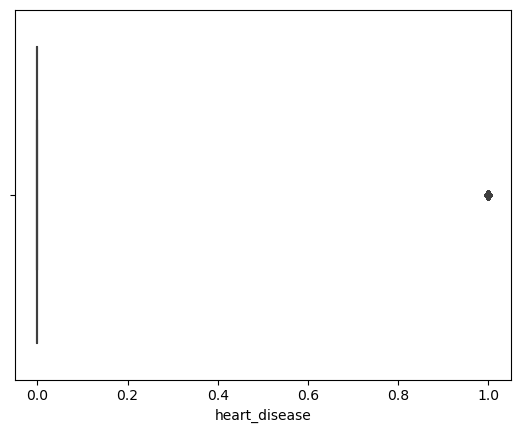

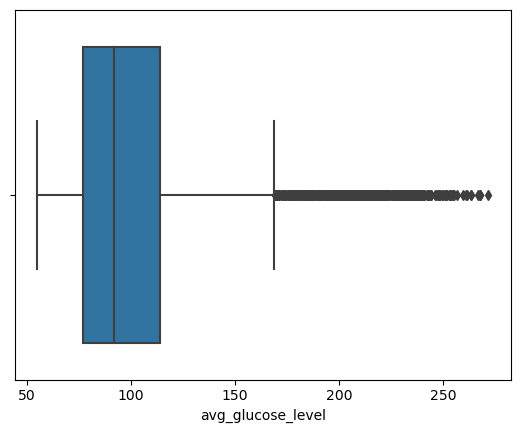

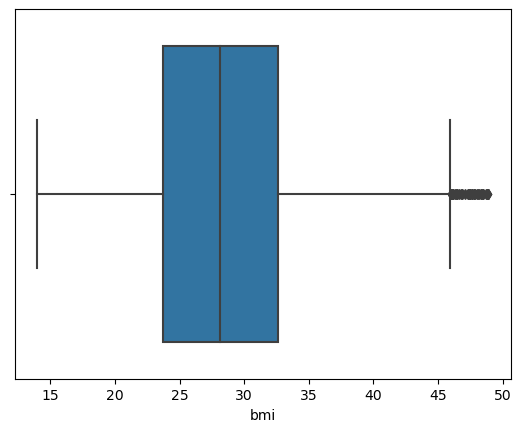

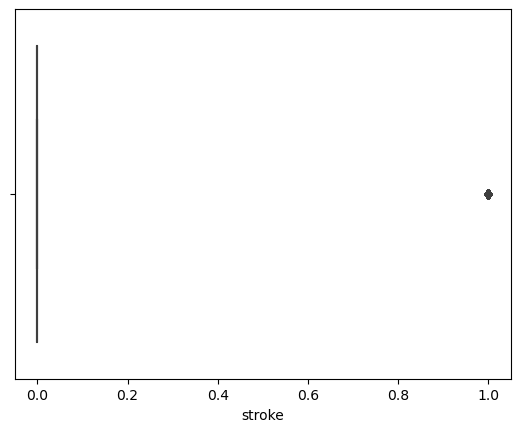

In [15]:
cols= df.select_dtypes(include=[np.number]).columns

for i in cols:
    ax= sns.boxplot(data=df, x=i)
    print()
    plt.show()

# Dropping the outliers

In [ ]:
def get_whisker_bounds(df, column):
    fig, ax = plt.subplots()
    box = ax.boxplot(df[column].dropna(), vert=False)
    plt.close(fig)

    whiskers = [line.get_xdata()[1] for line in box['whiskers']]
    return whiskers[0], whiskers[1]

def remove_outliers_using_whiskers(df):
    df_clean = df.copy()
    outliers = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        if col not in ['stroke', 'heart_disease', 'hypertension']:  

            lower_whisker, upper_whisker = get_whisker_bounds(df, col)
            outlier_count = ((df[col] < lower_whisker) | (df[col] > upper_whisker)).sum()
            outliers[col] = (lower_whisker, upper_whisker, outlier_count)

            df_clean = df_clean[(df_clean[col] >= lower_whisker) & (df_clean[col] <= upper_whisker)]

    outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Lower Whisker', 'Upper Whisker', 'No. of Outliers'])

    print(outliers_df.to_string(index=True))
    return df_clean

df_cleaned = remove_outliers_using_whiskers(df)
print(f"\nOriginal shape: {df.shape}, New shape: {df_cleaned.shape}")


                   Lower Whisker  Upper Whisker  No. of Outliers
age                         0.08          82.00                0
avg_glucose_level          55.12         168.68              602
bmi                        14.00          45.90               43

Original shape: (4981, 11), New shape: (4347, 11)


# Plotting the dataset after cleaning the outliers

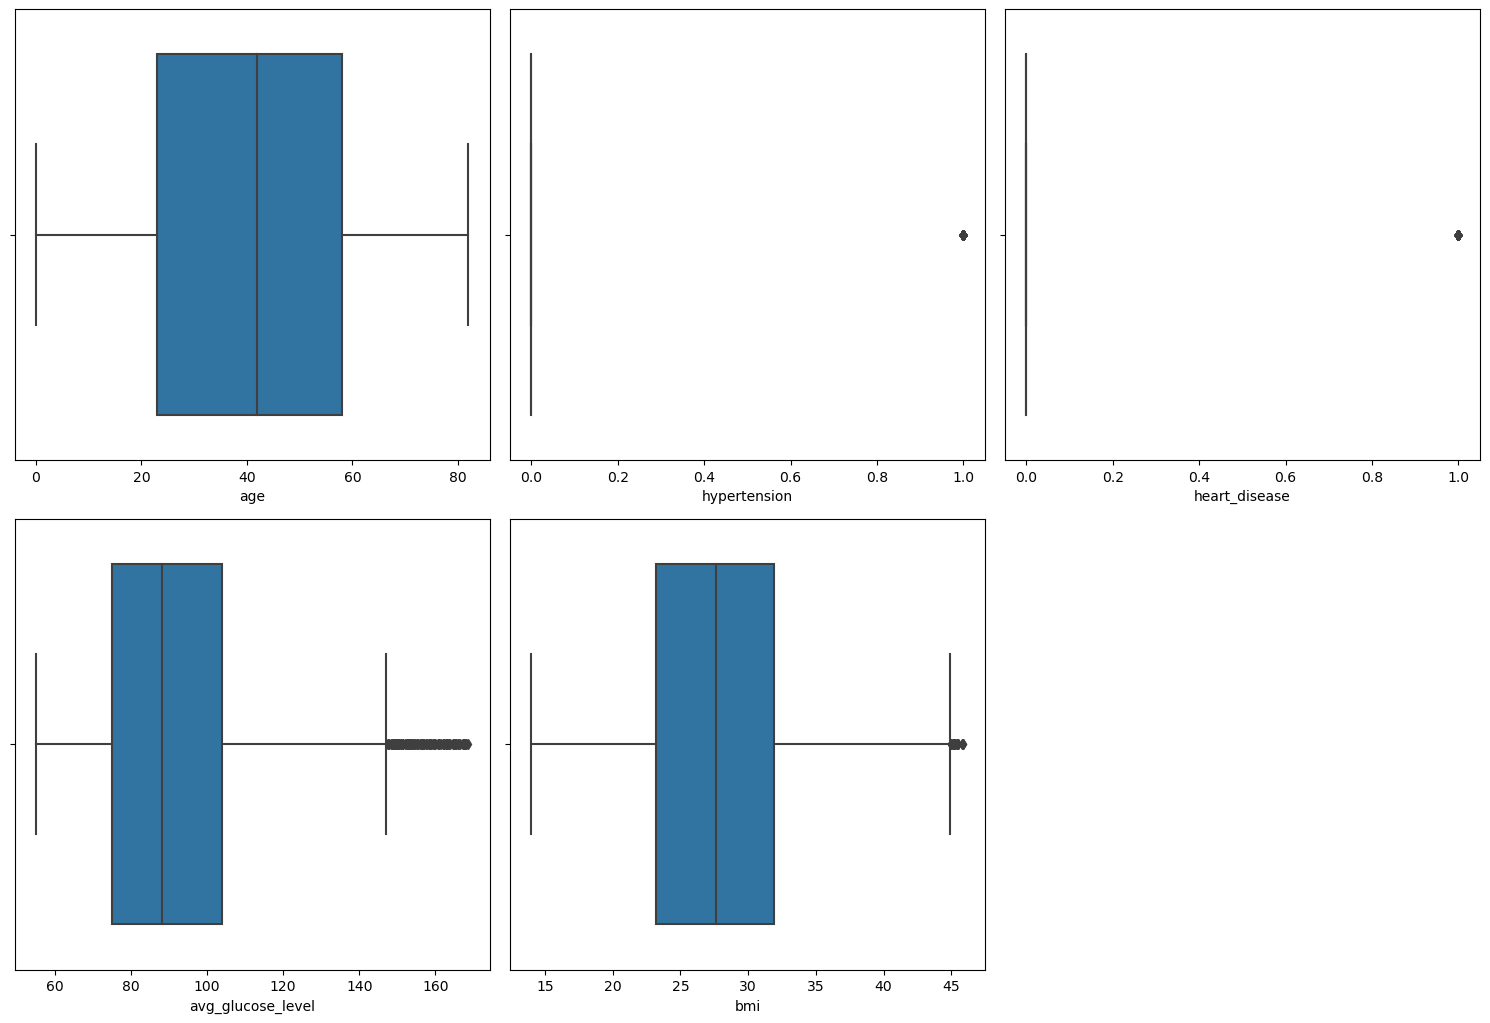

In [17]:
cols= df_cleaned.select_dtypes(include=[np.number]).columns[:-1]
plt.figure(figsize=(15,15))
for count, col in enumerate(cols):
    plt.subplot(3,3,count+1)
    sns.boxplot(data=df_cleaned, x=col)
plt.tight_layout()
plt.show()

In [18]:
df=df_cleaned

# Correlation 

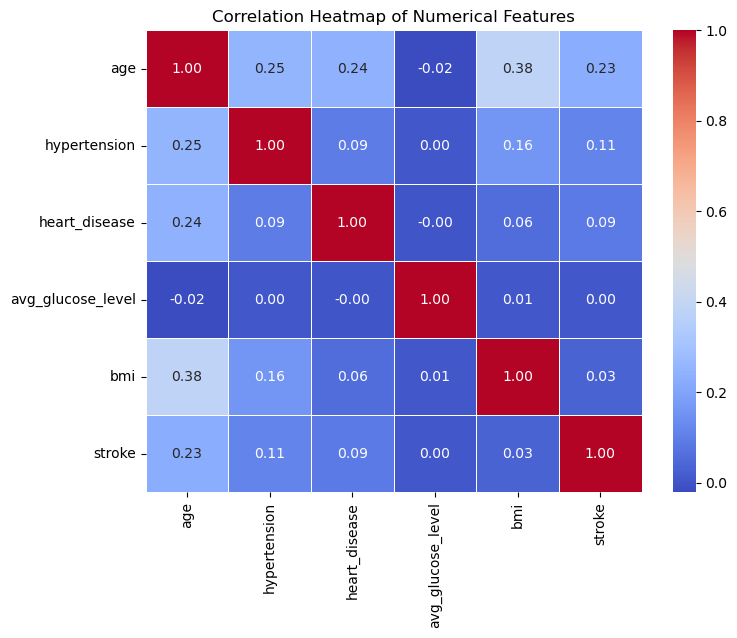

In [19]:
cols=df.select_dtypes(include=np.number)[:-1]
cor_matrix=cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Machine Learning Begins

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [21]:
print(df.head().to_string(index=False))

gender  age  hypertension  heart_disease ever_married work_type Residence_type  avg_glucose_level  bmi smoking_status  stroke
  Male 80.0             0              1          Yes   Private          Rural             105.92 32.5   never smoked       1
  Male 74.0             1              1          Yes   Private          Rural              70.09 27.4   never smoked       1
Female 69.0             0              0           No   Private          Urban              94.39 22.8   never smoked       1
Female 78.0             0              0          Yes   Private          Urban              58.57 24.2        Unknown       1
Female 81.0             1              0          Yes   Private          Rural              80.43 29.7   never smoked       1


In [22]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

print(pd.DataFrame(x).head(2).to_string(index=False))
# print(pd.DataFrame(y).to_string(index=False))

   0     1 2 3   4       5     6       7     8            9
Male  80.0 0 1 Yes Private Rural  105.92  32.5 never smoked
Male  74.0 1 1 Yes Private Rural   70.09  27.4 never smoked


# Encoding the Categorical Columns

In [23]:
labEnc_gender=LabelEncoder()
labEnc_ever_married=LabelEncoder()
labEnc_work_type=LabelEncoder()
labEnc_Residence_type=LabelEncoder()
labEnc_smoking_status=LabelEncoder()
x[:, 0] = labEnc_gender.fit_transform(x[:, 0])  # Gender: Female 0, Male 1
x[:, 4] = labEnc_ever_married.fit_transform(x[:, 4])  # Smoker: Yes 1, No 0
x[:, 5] = labEnc_work_type.fit_transform(x[:, 5])  # Region: Northeast 0, Northwest 1, Southeast 2, Southwest 3
x[:, 6] = labEnc_Residence_type.fit_transform(x[:, 6]) 
x[:, 9] = labEnc_smoking_status.fit_transform(x[:, 9]) 
print(x)

[[1 80.0 0 ... 105.92 32.5 2]
 [1 74.0 1 ... 70.09 27.4 2]
 [0 69.0 0 ... 94.39 22.8 2]
 ...
 [0 45.0 1 ... 95.02 31.8 3]
 [1 40.0 0 ... 83.94 30.0 3]
 [0 80.0 1 ... 83.75 29.1 2]]


# Column Transforming the encoded columns

In [24]:
ct=ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), [0, 4,  5, 6, 9])
    ],
    remainder= 'passthrough'
)

X=ct.fit_transform(x)
print(pd.DataFrame(X).head(2).to_string(index=False))

  0    1    2    3    4    5    6    7    8     9  10 11      12    13
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  80.0  0  1  105.92  32.5
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  74.0  1  1   70.09  27.4


# Splitting the training and test data

In [25]:
X_test,X_train,y_test,y_train=train_test_split(
    X,y,test_size=0.25,random_state=2
)

# Scaling the values of x for the algorithms that required scaled x values

In [26]:
ss_x = StandardScaler()
scaled_x_train = ss_x.fit_transform(X_train)
scaled_x_test = ss_x.transform(X_test)

Now we take each of the algorithms, and we do hyperparameter tuning to get the best parameters for the given dataset. We are using Grid Search for this purpose.

# 1.<strong> Decision Tree Classifier </strong>

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
param_dtc = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2'],  
    'splitter': ['best', 'random'],  
}

gridCLF=GridSearchCV(dtc, param_dtc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(X_train, y_train)
# print(gridCLF.best_params_)


# Hyperparameters after tuning:
# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}

# 2. <strong> Random Forest Classifier </strong>

In [ ]:
rfc = RandomForestClassifier()

param_rfc = {
    'n_estimators': [100, 150],  # Reduced options
    'max_depth': [10, 20],  # Removed None option
    'min_samples_split': [2, 5],  # Removed 10
    'min_samples_leaf': [1, 2],  # Removed 4
    'max_features': ['sqrt', 'log2'],  # Removed None
    'bootstrap': [True],  # Fixed to True (commonly used)
    'criterion': ['gini']  # Fixed to 'gini' (less impact on accuracy)
}

gridCLF = GridSearchCV(rfc, param_rfc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(X_train, y_train)

# print(gridCLF.best_params_)

# {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


# 3. <strong>KNN Classifier </strong>

In [ ]:
knn = KNeighborsClassifier()


param_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 20, 30, 40] 
}


gridCLF = GridSearchCV(knn, param_knn, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)


# print( gridCLF.best_params_)
#  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


c:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.95583224 0.9512324  0.95859299 0.95858876 0.95767979 0.95675813
 0.95860145 0.95767979 0.95860145 0.95860145 0.95674967 0.95306726
 0.95767556 0.95767133 0.95860145 0.95859722 0.95860145 0.9595231
 0.95860145 0.95860145 0.95583224 0.9512324  0.95859299 0.95858876
 0.95767979 0.95675813 0.95860145 0.95767979 0.95860145 0.95860145
 0.95583224 0.9512324  0.95859299 0.95858876 0.95767979 0.95675813
 0.95860145 0.95767979 0.95860145 0.95860145 0.95674967 0.95306726
 0.95767556 0.95767133 0.95860145 0.95859722 0.95860145 0.9595231
 0.95860145 0.95860145 0.95583224 0.9512324  0.95859299 0.95858876
 0.95767979 0.95675813 0.95860145 0.95767979 0.95860145 0.95860145
 0.95583224 0.9512324  0.95859299 0.95858876 0.95767979 0.95675813
 0.95860145 0.95767979 0.95860145 0.95860145 0.95674967 0.95306726
 0.95767556 0.95767133 0.95860145 0.95859722 0.95860145 0.

# 4. <strong> SVM Classifier </strong>

In [ ]:
svc = SVC()


param_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Specifies the kernel type to be used
    'degree': [3, 4, 5],  # Degree of the polynomial kernel function (used when kernel='poly')
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'class_weight': [None, 'balanced']  # Handles class imbalance if necessary
}


gridCLF = GridSearchCV(svc, param_svc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)


# print(gridCLF.best_params_)

#  {'C': 1, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

{'C': 0.1, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}


# 5. <strong>Gaussian Naive-Bayesian Classifier </strong>

In [45]:
gnb = GaussianNB()


param_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
}


gridCLF = GridSearchCV(gnb, param_gnb, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)

# print( gridCLF.best_params_)
#  {'var_smoothing': 1e-09}

Now we create a function to return the accuracy measures and error metrics after training the algorithm. We also create a dictionary for referencing each algorithms

In [46]:
def model_evaluation(model, X_train, x_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(x_test)
    
    accuuracy = metrics.accuracy_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    return accuuracy, mae, rmse


models = {
    "Decision Tree Classifier": DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= None, min_samples_leaf= 1, min_samples_split= 10, splitter= 'best'),
    "Random Forest Classifier": RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200),
    "KNN Classifier": KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, metric= 'manhattan', n_neighbors= 3, weights= 'distance'),
    "SVC Classifier": SVC(C= 1, class_weight= None, degree= 3, gamma= 'scale', kernel= 'linear'),
    "Gaussian Naive-Bayesian Classifier": GaussianNB(var_smoothing= 1e-09)
}

Now we call the above created function, and change up the x data according to the algorithm used. Also the results of the evaluation is stored into the results_df.

In [47]:
results = []


for model_name, model in models.items():
    if model_name == "KNN Classifier" or model_name == "SVC Classifier":
        accuracy, mae, rmse = model_evaluation(model, scaled_x_train, scaled_x_test, y_train, y_test)
    else:
        accuracy, mae, rmse = model_evaluation(model, X_train, X_test, y_train, y_test)
    
    results.append({
        "Model": model_name,
        "Accuracy Score": accuracy,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse
    })


results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

                             Model  Accuracy Score  Mean Absolute Error  Root Mean Squared Error
          Decision Tree Classifier        0.941104             0.058896                 0.242684
          Random Forest Classifier        0.961656             0.038344                 0.195815
                    KNN Classifier        0.945706             0.054294                 0.233012
                    SVC Classifier        0.963190             0.036810                 0.191859
Gaussian Naive-Bayesian Classifier        0.862883             0.137117                 0.370293


Visualizing the results (Accuracy Score, Root Mean Squared Error and Mean Absolute Error)

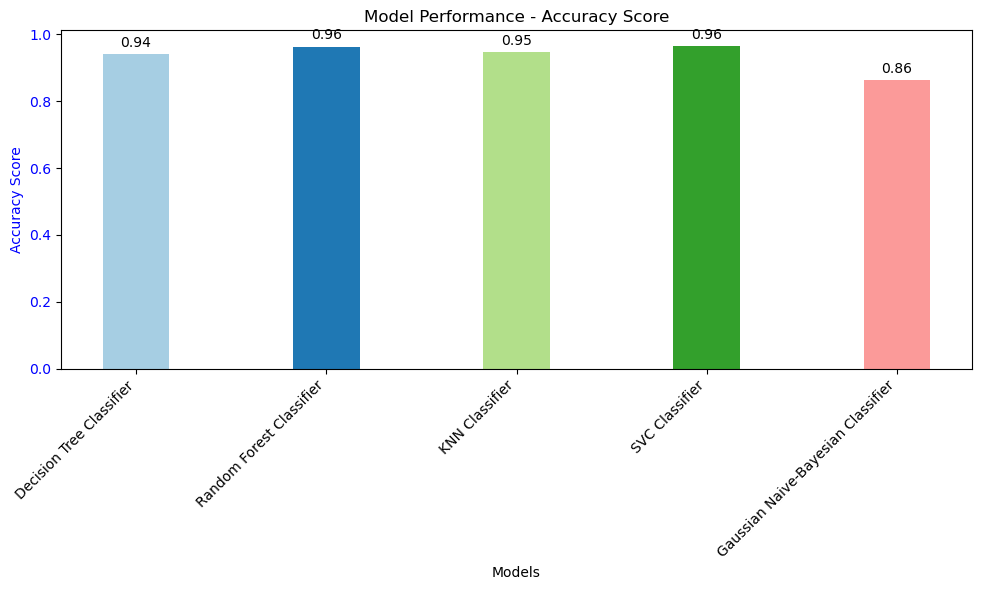

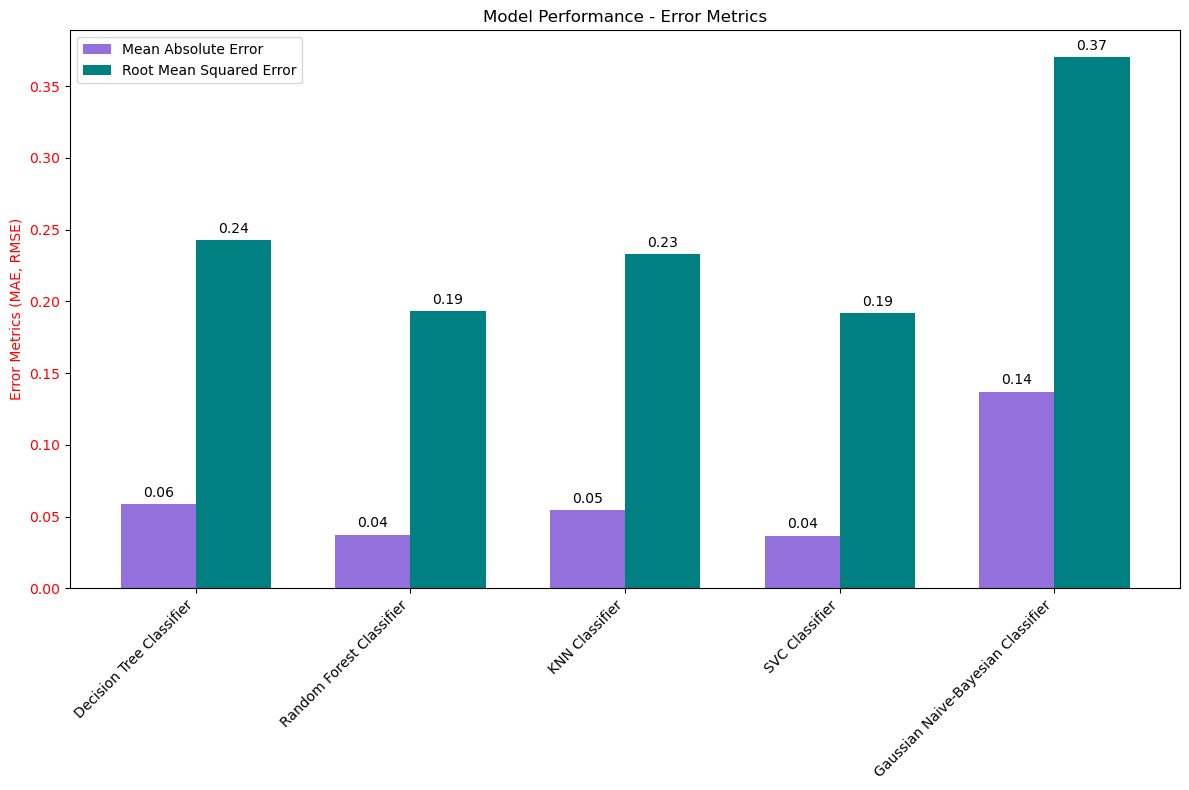

In [34]:
model_names = results_df['Model'] 
accuracy_values = results_df['Accuracy Score']
mae_values = results_df['Mean Absolute Error']
rmse_values = results_df['Root Mean Squared Error']

x = np.arange(len(model_names))  
width = 0.35  

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_accuracy = ax1.bar(x, accuracy_values, width, color=plt.cm.Paired.colors[:len(model_names)], label='Accuracy Score')

ax1.set_title('Model Performance - Accuracy Score')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

for bar in bar_accuracy:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()

fig, ax2 = plt.subplots(figsize=(12, 8))
bar_mae = ax2.bar(x - width / 2, mae_values, width, label='Mean Absolute Error', color='mediumpurple')
bar_rmse = ax2.bar(x + width / 2, rmse_values, width, label='Root Mean Squared Error', color='teal')

ax2.set_ylabel('Error Metrics (MAE, RMSE)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=45, ha='right')
ax2.set_title('Model Performance - Error Metrics')

for bars in [bar_mae, bar_rmse]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

ax2.legend()

plt.tight_layout()
plt.show()

From the above results, we can observe that Random Forest Classification and Support Vector Classifier has the best accuracy score of 96%. But SVC Classifier has the lower error metrics. Hence we choose SVC Classifier   for the building the classifier model.

In-program custom input

In [35]:
import numpy as np

x_custom = np.array([['Male', 67.0, 0, 1, 'Yes', 'Private', 'Urban', 36.6, 'formerly smoked', 1]], dtype=object)

# Ensure x_custom is 2D
x_custom = x_custom.reshape(1, -1)  # This keeps it as a 2D array

# Apply Label Encoding
x_custom[:, 0] = labEnc_gender.transform(x_custom[:, 0])  
x_custom[:, 4] = labEnc_ever_married.transform(x_custom[:, 4])  
x_custom[:, 5] = labEnc_work_type.transform(x_custom[:, 5])   # Fixed incorrect index
x_custom[:, 6] = labEnc_Residence_type.transform(x_custom[:, 6])  # Fixed incorrect index
x_custom[:, 8] = labEnc_smoking_status.transform(x_custom[:, 8])  

# Apply transformations
x_custom = ct.transform(x_custom)

# Make prediction
y_custom = models['SVC Classifier'].predict(x_custom)

print("Custom input prediction:", y_custom[0].round(2))


Custom input prediction: 0


# Conclution

### By learning from these features, the model can help identify individuals at higher risk of stroke. This can support early diagnosis, preventive healthcare strategies, and better medical decision-making to reduce the risk of stroke-related complications.